In [70]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from numpy import log10
import h5py

In [71]:
file_path = r"C:\Users\kispz\OneDrive - Texas State University\REU MMA\Data\dirtygrid_dustony_2jun25\lmc2_bc10-wd01\cloudy\clumpy\lmc2_bc10-wd01_cloudy_clumpy-s6.32456e+14-t0.1-m0.1-a1_global_lum.table.fits"
file_hdf5 = r"C:\Users\kispz\OneDrive - Texas State University\REU MMA\Data\dirtygrid_29mar17.hdf5"

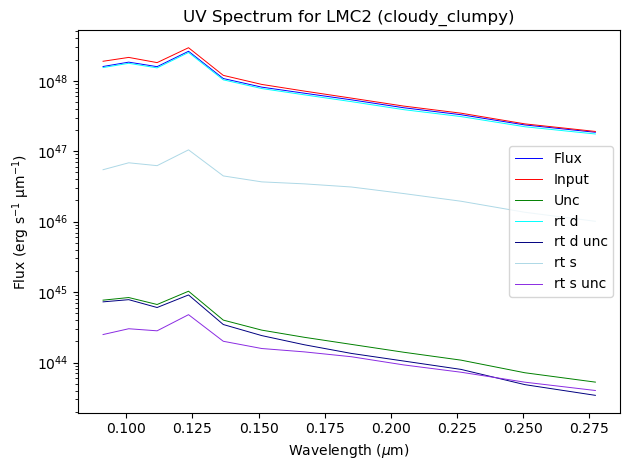

In [69]:

with fits.open(file_path) as hdul:
    # hdul.info()
    data = hdul[1].data
    # print(data.columns)

    wavelength = data['wavelength'] * u.micron
    mask = wavelength < 0.3 * u.micron
    wavelength_uv = wavelength[mask].value 
    
    flux_components = {
        'flux': ('blue', 'Flux'),
        'flux_input': ('red', 'Input'),
        'flux_unc': ('green', 'Unc'),
        'flux_rt_d': ('cyan', 'rt d'),
        'flux_rt_d_unc': ('navy', 'rt d unc'),
        'flux_rt_s': ('lightblue', 'rt s'),
        'flux_rt_s_unc': ('blueviolet', 'rt s unc')
    }

    plt.figure()
    
    for key, (color, label) in flux_components.items():
        ydata = data[key][mask]
        plt.plot(wavelength_uv, ydata, color=color, linewidth=0.7, label=label)

    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Flux (erg s$^{-1}$ µm$^{-1}$)')
    plt.yscale('log')
    plt.title('UV Spectrum for LMC2 (cloudy_clumpy)')
    plt.legend()
    plt.tight_layout()
    plt.show()


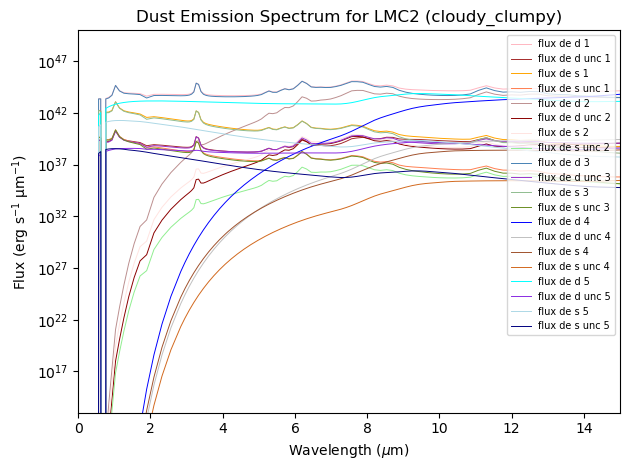

In [68]:
with fits.open(file_path) as hdul:
    data = hdul[1].data
    wavelength_uv = data['wavelength'] * u.micron


    components = ['flux_de_d', 'flux_de_d_unc', 'flux_de_s', 'flux_de_s_unc']
    colors = {
        'flux_de_d': ['lightpink', 'rosybrown', 'steelblue', 'blue', 'cyan'],
        'flux_de_d_unc': ['brown', 'darkred', 'darkorchid', 'silver', 'blueviolet'],
        'flux_de_s': ['orange', 'mistyrose', 'darkseagreen', 'sienna', 'lightblue'],
        'flux_de_s_unc': ['coral', 'lightgreen', 'olivedrab', 'chocolate', 'navy']
    }

    plt.figure()

    for i in range(1, 6): 
        for comp in components:
            colname = f"{comp}_{i}"
            y = data[colname]
            color = colors[comp][i - 1]
            label = colname.replace('_', ' ')
            plt.plot(wavelength_uv, y, color=color, linewidth=0.7, label=label)

    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Flux (erg s$^{-1}$ µm$^{-1}$)')
    plt.yscale('log')
    plt.title('Dust Emission Spectrum for LMC2 (cloudy_clumpy)')
    plt.legend(loc='upper right', fontsize=7)
    plt.xlim(0, 15)
    plt.ylim(1e13, 1e50)
    plt.tight_layout()
    plt.show()



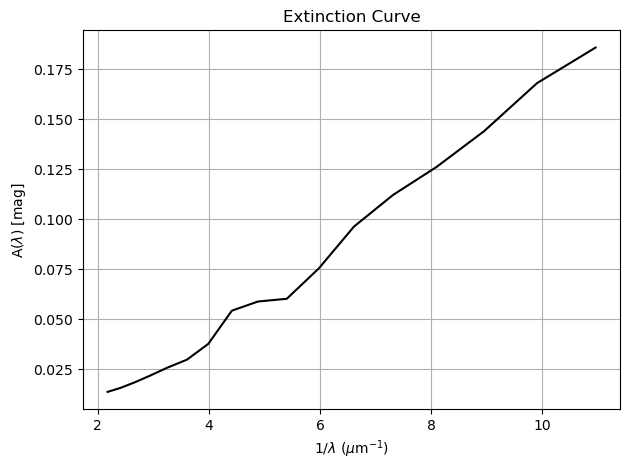

In [88]:
with fits.open(file_path) as hdul: 
    data = hdul[1].data

    wavelength = data['wavelength'] *u.micron
    flux = data['flux']
    flux_input = data['flux_input']

    mask = wavelength < 0.5 *u.micron
    wavelength_uv = wavelength[mask].value
    flux_uv = flux[mask]
    flux_input_uv = flux_input[mask]


    flux_uv = np.clip(flux_uv, 1e-39, None)
    flux_input_uv = np.clip(flux_input_uv, 1e-30, None)
    
    A_lam = -2.5 * log10(flux_uv/flux_input_uv)
    inv_lam = 1/wavelength_uv
    
    plt.figure()
    plt.plot(inv_lam, A_lam, color = 'black')
    plt.xlabel('1/$\lambda$ ($\mu$m$^{-1}$)')
    plt.ylabel('A($\lambda$) [mag]')
    plt.title('Extinction Curve')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [9]:

with h5py.File(file_hdf5, 'r') as f:
    def print_structure(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}, Shape: {obj.shape}, Dtype: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"Group: {name}")

    f.visititems(print_structure)

Dataset: JohnB, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: JohnH, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: JohnI, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: JohnJ, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: JohnK, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: JohnR, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: JohnU, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: JohnV, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: PACS100, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: SDSSg, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: SDSSi, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: SDSSr, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: SDSSu, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: SDSSz, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: galex_fuv, Shape: (3, 6, 2, 5, 50, 29, 25), Dtype: float64
Dataset: galex_nuv, Shape: (3, 6, 

In [10]:

with h5py.File(file_hdf5, 'r') as f:
    data = f['galex_nuv'][:]  # replace with any dataset name
    print(data.shape)
    print(np.min(data), np.max(data))  # quick value check


(3, 6, 2, 5, 50, 29, 25)
1.0899248015773362e+30 6.850251012890743e+49
